In [66]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [67]:
df1 = pd.read_csv('data/notes.csv')
df2 = pd.read_csv('data/ratings.csv')

merged_df = pd.merge(df1, df2, on='noteId', how='inner')

data = merged_df[['noteId', 'summary', 'helpfulnessLevel', 'helpfulOther', 'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic', 'helpfulGoodSources', 'helpfulUniqueContext', 'helpfulAddressesClaim', 'helpfulImportantContext', 'helpfulUnbiasedLanguage']]
df = data.drop_duplicates().dropna()
print(df)

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
1      1783181538789605871  The United States has 50 States     https://da...   
2      1783181538789605871  The United States has 50 States     https://da...   
3      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
...                    ...                                                ...   
13533  1769857672114024502   shope.ee/2AqghSiwVQ    Akun2 yang merusak ikl...   
13534  1775711591646081459  &quot;auschwitz.history&quot; is not the actua...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   
13537  1756026556504318371  N.N. Das ist kein Fall für die CNs sondern für...   

      helpfulnessLevel  hel

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
1      1783181538789605871  The United States has 50 States     https://da...   
3      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
5      1575594018691420160  This may be the first public demonstration of ...   
...                    ...                                                ...   
13526  1603580800691314688  None of  WaPo's Drew Harwall, NYT's Ryan Mac, ...   
13530  1744811920148906128  Starmer, like a lot of lawyers worked pro bono...   
13533  1769857672114024502   shope.ee/2AqghSiwVQ    Akun2 yang merusak ikl...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   

      helpfulnessLevel  hel

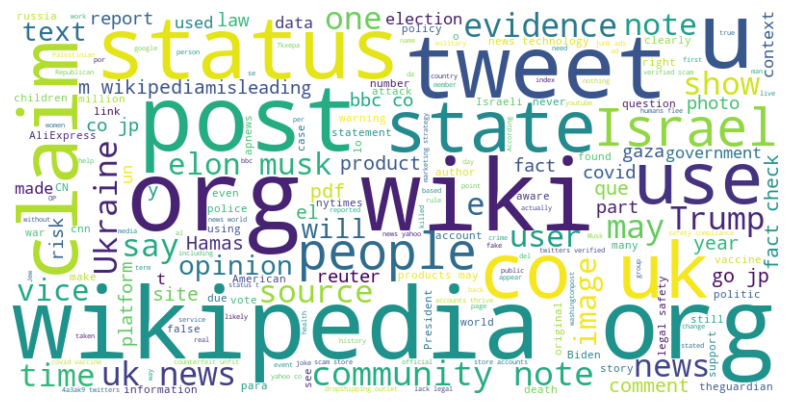

In [68]:
# Filter for notes rated helpful
helpful = df[df['helpfulnessLevel'] == 'HELPFUL']
text = helpful.get('summary')
print(helpful)

helpful_corpus = ' '.join(text)

# Create list of words to be excluded from the WordCloud
stopwords = set(STOPWORDS)
custom_stopwords = {'https', 'en', 'de', 'x', 'twitter', 'html', 'said', 'quot', 'video', 'article', 'la', 'new', 'amp', 's', 'NNN'}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(helpful_corpus)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
6      1591119055103983616  Yoel Roth is no longer the head of  Twitter’s ...   
9      1777467809221746749  This photo both not real and not from the Apri...   
12     1617041513506082818  Waving a flashlight from side to side is a sig...   
...                    ...                                                ...   
13520  1603460091579191299  Yoel Roth faced direct threats of violence fol...   
13522  1603580800691314688  None of  WaPo's Drew Harwall, NYT's Ryan Mac, ...   
13526  1603580800691314688  None of  WaPo's Drew Harwall, NYT's Ryan Mac, ...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   

      helpfulnessLevel  hel

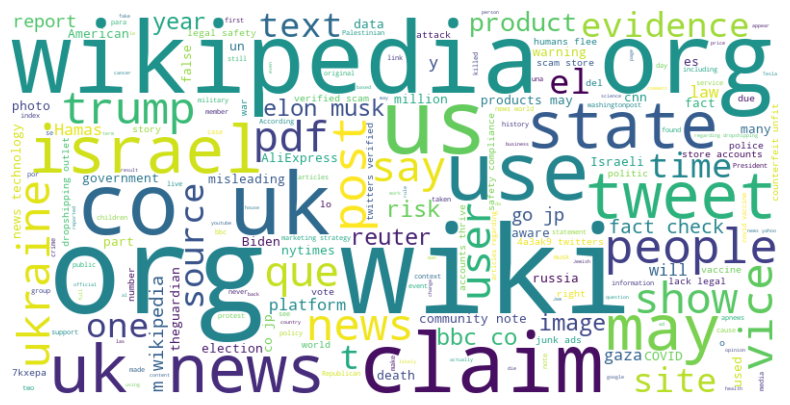

In [69]:
# Filter for notes rated helpful
helpful = df[df['helpfulGoodSources'] == 1]
text = helpful.get('summary')
print(helpful)

helpful_corpus = ' '.join(text)

# Create list of words to be excluded from the WordCloud
stopwords = set(STOPWORDS)
custom_stopwords = {'https', 'en', 'de', 'x', 'twitter', 'html', 'said', 'quot', 'video', 'article', 'la', 'new', 'amp', 's', 'NNN', 'e', 'status', 'u'}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(helpful_corpus)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
3      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
6      1591119055103983616  Yoel Roth is no longer the head of  Twitter’s ...   
9      1777467809221746749  This photo both not real and not from the Apri...   
...                    ...                                                ...   
13520  1603460091579191299  Yoel Roth faced direct threats of violence fol...   
13521  1603460091579191299  Yoel Roth faced direct threats of violence fol...   
13522  1603580800691314688  None of  WaPo's Drew Harwall, NYT's Ryan Mac, ...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   

       helpfulnessLevel  he

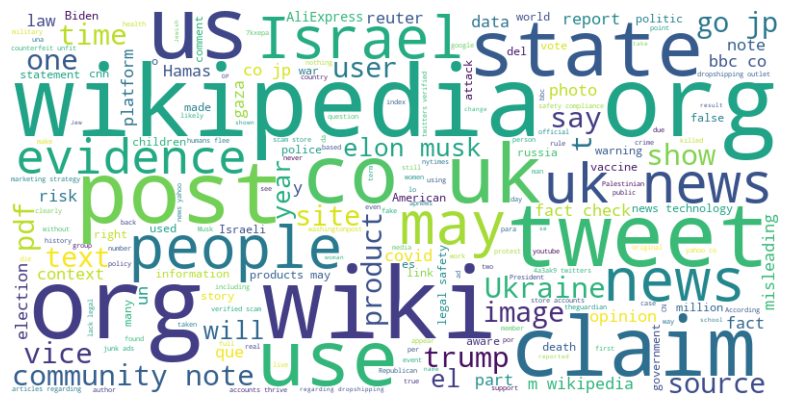

In [70]:
# Filter for notes rated helpful
helpful = df[df['helpfulClear'] == 1]
text = helpful.get('summary')
print(helpful)

helpful_corpus = ' '.join(text)

# Create list of words to be excluded from the WordCloud
stopwords = set(STOPWORDS)
custom_stopwords = {'https', 'en', 'de', 'x', 'twitter', 'html', 'said', 'quot', 'video', 'article', 'la', 'new', 'amp', 's', 'NNN', 'e', 'status', 'u'}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(helpful_corpus)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
3      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
6      1591119055103983616  Yoel Roth is no longer the head of  Twitter’s ...   
10     1782177611067596806  NNN - job numbers don’t rely on historical dat...   
...                    ...                                                ...   
13518  1598049853271154688  &quot;none of our policies have changed.&quot;...   
13520  1603460091579191299  Yoel Roth faced direct threats of violence fol...   
13522  1603580800691314688  None of  WaPo's Drew Harwall, NYT's Ryan Mac, ...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   

      helpfulnessLevel  hel

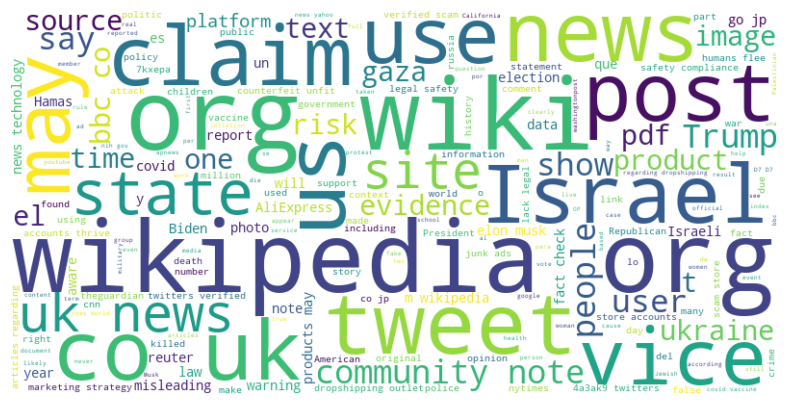

In [71]:
# Filter for notes rated helpful
helpful = df[df['helpfulUnbiasedLanguage'] == 1]
text = helpful.get('summary')
print(helpful)

helpful_corpus = ' '.join(text)

# Create list of words to be excluded from the WordCloud
stopwords = set(STOPWORDS)
custom_stopwords = {'https', 'en', 'de', 'x', 'twitter', 'html', 'said', 'quot', 'video', 'article', 'la', 'new', 'amp', 's', 'NNN', 'e', 'status', 'u'}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(helpful_corpus)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Roadblocks & Next Steps
The next steps to take for the WordCloud mainly consist of having the WordCloud cover different categories of helpfulness within the notes that are rated as helpful. For example, there are categories such as hepfulClear and helpfulEmpathetic, so the next steps would be finding a solution that can track patterns within these individual categories.